<a href="https://colab.research.google.com/github/GiangTTran/SparseRandomModeDecomposition/blob/main/examples/all_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All Parameters Example

Shows the use of every hyperparameter in SRMD on a challanging intersecting frequency example.

This is similar to the example shown in Section 3.2 of the [SRMD paper](https://arxiv.org/abs/2204.06108).

In [1]:
# download module from github
%pip install git+https://github.com/GiangTTran/SparseRandomModeDecomposition.git#egg=srmdpy

  Cloning https://github.com/GiangTTran/SparseRandomModeDecomposition.git to /tmp/pip-install-ciplg7bk/srmdpy_d6430cb6bad843d497a6b82c596c2695
  Running command git clone -q https://github.com/GiangTTran/SparseRandomModeDecomposition.git /tmp/pip-install-ciplg7bk/srmdpy_d6430cb6bad843d497a6b82c596c2695
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for srmdpy: filename=srmdpy-0.0.1-py3-none-any.whl size=11216 sha256=7eff0da565acdc2638f8254beb8395d3c4cab294f84fb97f8e6fc6e019d68f42
  Stored in directory: /tmp/pip-ephem-wheel-cache-ml5cly35/wheels/5b/89/54/7798db729d46561a5ecaef26ca37c2f67537ef21a8c732e2d5
Successfully built srmdpy


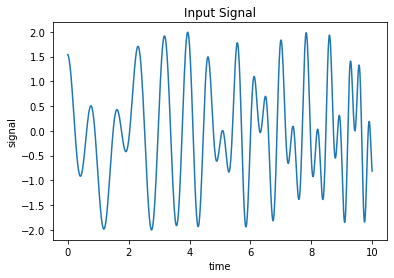

INFO:SRMD:After thresholding, there are 91 nonzero features out of 8000 features or 1.137%


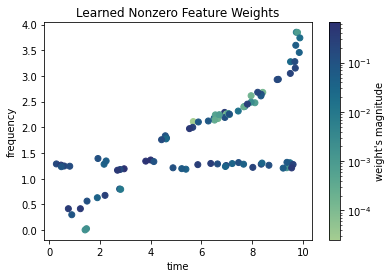

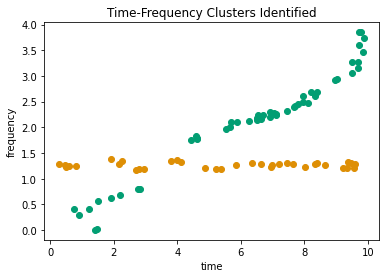

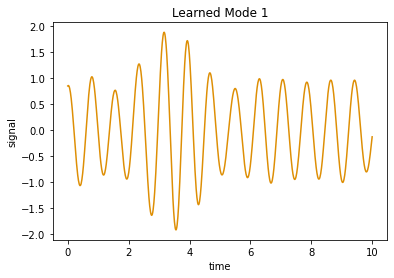

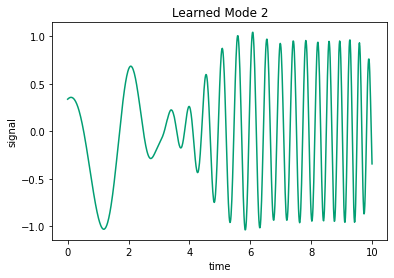

In [3]:
import numpy as np

from srmdpy import SRMD
import srmdpy.visualization as plot

twopi = 2 * np.pi

# Create signal
m = 800 # number of samples
t = np.linspace(0, 10, num=m)

y1 = np.cos(t**2 + t + np.cos(t))
y2 = np.cos(8*t)

y = y1 + y2

plot.signal(t, y, title='Input Signal')

# Separate the modes
kwargs = {'N_features': 10*m, # number of features to generate
          'eps':2,            # DBSCAN neighberhood radius
          'max_frq':5,        # highest frequency of a feature set to 5 Hz
          'w':1.5,            # Gaussian window size of 1.5 s
          'r':0.06,           # maximum relative error allowed is 6%
          'threshold':0.01,   # ignore features with magnitude in the smallest 1 percentile
          'frq_scale':twopi,  # scale features' frequency by 2pi before clustering
          'min_samples':5,    # minimum points to be in the core of a cluster
          'seed':314,         # set random seed
          'n_modes':2,        # ensure excess modes are merged so there's only 2
          'verbosity':1,      # print info about the number of nonzero features
          'return_features':True} # return feature parameters, weights, and labels
modes, (tau, frq, phs), weights, labels = SRMD(y, t, **kwargs)

# Plot the learned weights in time frequency space
print('')
plot.weights(tau, frq, weights, labels,
             title='Learned Nonzero Feature Weights')

# Plot the clusters and modes corresponding to those clusters
print('')
plot.modes_with_cluster(t, modes, tau, frq, labels)